In [1]:
import os
import sys
# Root folder
sys.path.append("../..")

import numpy as np
from PIL import Image

from apis.detectors import OWLViT
from apis.segmentors import SAM
from apis.language_model import GPT4V


from agents.dom import DOM

from utils.image_utils import annotate_positions_in_image, visualize_image
from utils.masks import Mask

/home/kaixin/anaconda3/envs/dom/lib/python3.10/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
init_image = Image.open("../assets/images/table_with_notebook.jpg").resize((480,360))

In [3]:
segmentor = SAM()
vlm = GPT4V()
detector = OWLViT()
agent = DOM(vlm=vlm, detector=detector, segmentor=segmentor, enable_logging=False)

In [4]:
detected_objects = detector.detect_objects(init_image, text_queries=["notebook"], )
detected_objects

[{'score': 0.6158325672149658,
  'bbox': [0.18310168385505676,
   0.13012468814849854,
   0.5277130007743835,
   0.3922276198863983],
  'box_name': 'notebook'}]

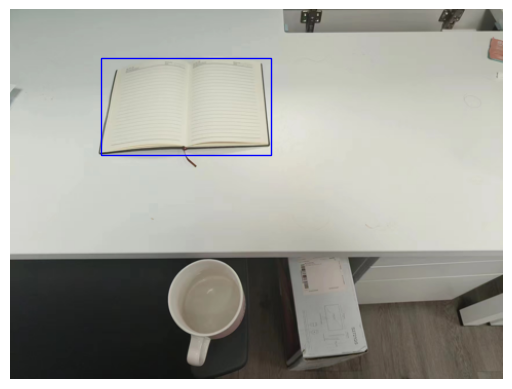

In [5]:
# Select the one in the middle
notebook = detected_objects[0]
visualize_image(image=init_image, bboxes=[notebook["bbox"]])

In [6]:
seg_result = segmentor.segment_by_bboxes(init_image, bboxes=[notebook["bbox"]])[0]
notebook_mask = Mask(mask=seg_result["segmentation"], name="notebook", ref_image=init_image)

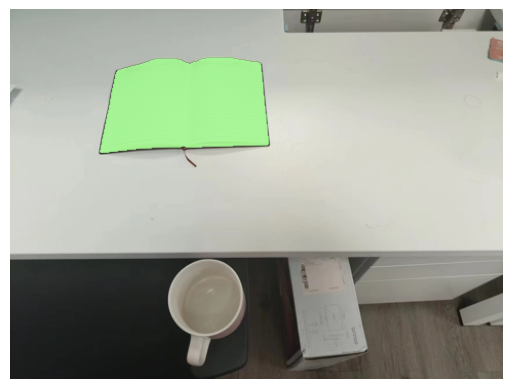

In [7]:
visualize_image(image=init_image, masks=[notebook_mask.mask])

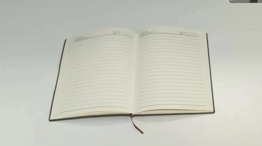

In [8]:
cropped_image, cropped_bbox = notebook_mask.crop_obj(padding=0.3)
cropped_image

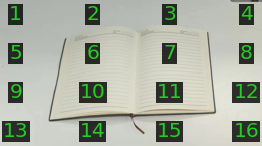

In [9]:
x_interval, y_interval = 4, 4
x_margin, y_margin = 0.06, 0.1
x = np.linspace(0 + x_margin, 1 - x_margin, x_interval)
y = np.linspace(0 + y_margin, 1 - y_margin, y_interval)

# Create the meshgrid
X, Y = np.meshgrid(x, y)
X = X.flatten()
Y = Y.flatten()
positions = np.vstack([X, Y]).T

mask = np.ones((cropped_image.width, cropped_image.height))
output = annotate_positions_in_image(cropped_image, positions, font_size=min(cropped_image.size) * 0.1)
output

[0.43213888888888885, 0.20425925925925928]


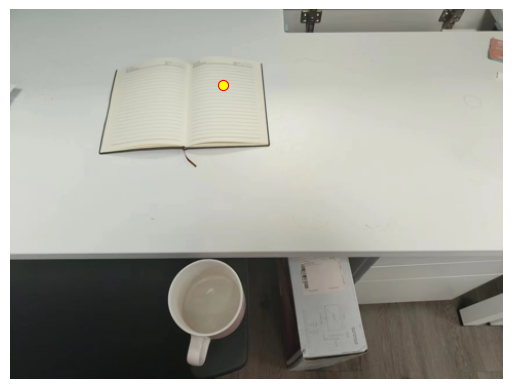

In [10]:
place_point = agent.query_place_position(
            notebook_mask,
            intervals=(4, 4), 
            margins=(0.06, 0.1),
            orientation = "on_top_of"
)
print(place_point)
visualize_image(image=init_image, points=[place_point])

[0.5922499999999999, 0.20425925925925928]


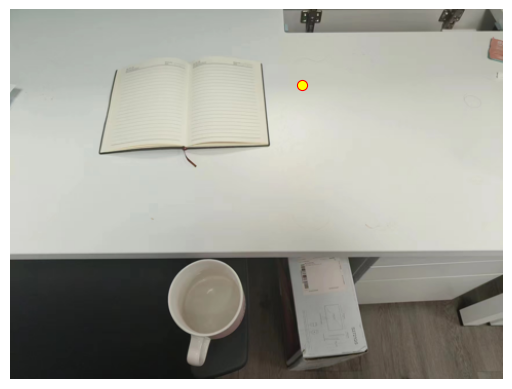

In [12]:
place_point = agent.query_place_position(
            notebook_mask,
            intervals=(4, 4), 
            margins=(0.06, 0.1),
            orientation = "to_the_right_of"
)
print(place_point)
visualize_image(image=init_image, points=[place_point])

[0.43213888888888885, 0.42055555555555557]


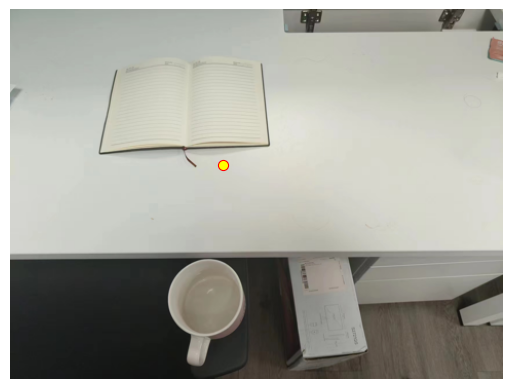

In [13]:
place_point = agent.query_place_position(
            notebook_mask,
            intervals=(4, 4), 
            margins=(0.06, 0.1),
            orientation = "to_the_bottom_of"
)
print(place_point)
visualize_image(image=init_image, points=[place_point])

[0.27202777777777776, 0.09611111111111112]


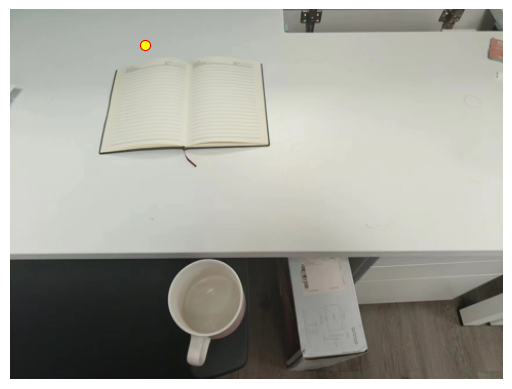

In [14]:
place_point = agent.query_place_position(
            notebook_mask,
            intervals=(4, 4), 
            margins=(0.06, 0.1),
            orientation = "to_the_top_of"
)
print(place_point)
visualize_image(image=init_image, points=[place_point])